Código para implementação de uma rede neural simples visto na aula do dia 12/06

Para uma melhor explicação do funcionamento de uma NN (Neural Network) a playlist a seguir contém o que  eu considero a explicação simples mais completa: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

In [1]:
import torch
print(torch.__version__)

ModuleNotFoundError: No module named 'torch'

In [2]:
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms 
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import torchvision



## Single Neuron Network

In [4]:
class Net(nn.Module): # Cria uma rede neural com uma camada e um neuron
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1) # Aqui é declarado as camadas
        
    def forward(self, x): # Esta função é chamada quando aplica-se à rede ao input
        x = self.fc1(x)
        return x
      
net = Net()
print(net)
print()
print(list(net.parameters()))

Net(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)

[Parameter containing:
tensor([[-0.0082]], requires_grad=True), Parameter containing:
tensor([0.7200], requires_grad=True)]


In [0]:
input = Variable(torch.randn(1,1,1), requires_grad=True)
print(input)

In [0]:
out = net(input)
print(out)

tensor([[[1.9975]]], grad_fn=<AddBackward0>)


In [0]:
def criterion(out, label): # Função de erro (loss function)
    return (label - out)**2
  
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [0]:
data = [(1,4), (2,7), (3,10), (4,13), (5,16), (6,19)]

In [0]:
for epoch in range(100):
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X = Variable(torch.FloatTensor([X]), requires_grad=True)
        Y = Variable(torch.FloatTensor([Y]), requires_grad=False)
        optimizer.zero_grad() #zera os gradientes, é necessário fazer isso porque eles se acumumlam a cada iteração
        outputs = net(X) # Aplica a rede neural à X
        loss = criterion(outputs, Y) # Calculo da função de erro 
        loss.backward() # Calcula os gradientes em relação à função de erro
        optimizer.step() # Atualiza os pesos e vieses da rede aplicando os gradientes
        if (i % 10 == 0 and epoch %10==0):
            print("Epoch {} - loss: {}".format(epoch, loss.data[0]))

Epoch 0 - loss: 0.002081268234178424
Epoch 10 - loss: 0.0013033068971708417
Epoch 20 - loss: 0.0008161186706274748
Epoch 30 - loss: 0.0005110265337862074
Epoch 40 - loss: 0.00032001713407225907
Epoch 50 - loss: 0.0002004020061576739
Epoch 60 - loss: 0.00012548163067549467
Epoch 70 - loss: 7.857763557694852e-05
Epoch 80 - loss: 4.920673745800741e-05
Epoch 90 - loss: 3.081206159549765e-05


In [0]:
print(list(net.parameters()))

[Parameter containing:
tensor([[2.9990]], requires_grad=True), Parameter containing:
tensor([1.0054], requires_grad=True)]


##Not MNIST

In [0]:
input_size    = 784
hidden_size   = 500 
num_classes   = 10 
num_epochs    = 10  
batch_size    = 100   
learning_rate = 1e-3

In [0]:
train_dataset = dsets.FashionMNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.FashionMNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor(),
                           download=True)

In [0]:
# Ambas variáveis abaixo separam o conjunto em batchs
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [0]:
classes = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};


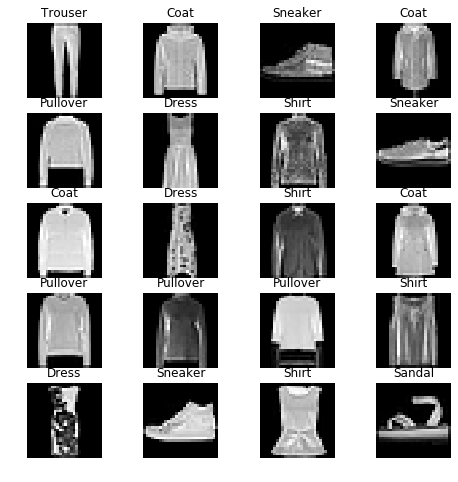

In [0]:
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;

# Plota as imagens
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(classes[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [0]:
# Diferente da rede anterior, esta rede tem duas camadas, é possível adicionar
# mais camadas declarando mais nn.Linear
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() # Função não linear, aplicar ela em todas as camadas
                              # menos na última
        self.fc2 = nn.Linear(hidden_size, num_classes) 
    
    def forward(self, x):                              
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [0]:
net = Net(input_size, hidden_size, num_classes)

In [0]:
if train_on_gpu:
    net.cuda()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [0]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   
        images = Variable(images.view(-1, 28*28))         
        labels = Variable(labels)
        
        if train_on_gpu:
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             
        outputs = net(images)                             
        loss = criterion(outputs, labels)                 
        loss.backward()                                   
        optimizer.step()                                  
        
        if (i+1) % 100 == 0:                              
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))



Epoch [1/10], Step [100/600], Loss: 2.2383
Epoch [1/10], Step [200/600], Loss: 2.1765
Epoch [1/10], Step [300/600], Loss: 2.1357
Epoch [1/10], Step [400/600], Loss: 2.0879
Epoch [1/10], Step [500/600], Loss: 1.9824
Epoch [1/10], Step [600/600], Loss: 2.0133
Epoch [2/10], Step [100/600], Loss: 1.9207
Epoch [2/10], Step [200/600], Loss: 1.9137
Epoch [2/10], Step [300/600], Loss: 1.8225
Epoch [2/10], Step [400/600], Loss: 1.7580
Epoch [2/10], Step [500/600], Loss: 1.7087
Epoch [2/10], Step [600/600], Loss: 1.6770
Epoch [3/10], Step [100/600], Loss: 1.6473
Epoch [3/10], Step [200/600], Loss: 1.5462
Epoch [3/10], Step [300/600], Loss: 1.5089
Epoch [3/10], Step [400/600], Loss: 1.5294
Epoch [3/10], Step [500/600], Loss: 1.4724
Epoch [3/10], Step [600/600], Loss: 1.3232
Epoch [4/10], Step [100/600], Loss: 1.3752
Epoch [4/10], Step [200/600], Loss: 1.3232
Epoch [4/10], Step [300/600], Loss: 1.3074
Epoch [4/10], Step [400/600], Loss: 1.2940
Epoch [4/10], Step [500/600], Loss: 1.2604
Epoch [4/10

## Evaluate the model

In [0]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    
    if train_on_gpu:
        images = images.cuda()
        labels = labels.cuda()
    
    
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  
    total += labels.size(0)                   
    correct += (predicted == labels).sum()     
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 70 %


In [0]:
torch.save(net.state_dict(), 'nn_weights.pt') #Salva os pesos e vieses da rede,
                                              # Podem ser recuperados com torch.load